In [26]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rc('figure', figsize=(10, 10))  
%matplotlib inline

In [2]:
data = pd.read_csv('NationalNames.csv')

In [3]:
data.head(100)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
95,96,Amelia,1880,F,221
96,97,Hannah,1880,F,221
97,98,Jane,1880,F,215
98,99,Virginia,1880,F,213


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 5 columns):
Id        int64
Name      object
Year      int64
Gender    object
Count     int64
dtypes: int64(3), object(2)
memory usage: 73.4+ MB


In [5]:
data_b = data[(data.Gender == 'M') & ( 2010 <= data.Year) & (data.Year < 2018)]

In [6]:
data_g = data[(data.Gender == 'F') & ( 2010 <= data.Year) & (data.Year < 2018)]

In [7]:
data_b1 = data_b.groupby('Name').Count.sum().nlargest(15)

In [8]:
data_b1

Name
Noah         145195
Jacob        140091
Mason        133535
Liam         133019
William      131241
Ethan        125561
Michael      122265
Alexander    118376
James        112387
Daniel       111658
Elijah       110075
Aiden        109852
Jayden       109122
Benjamin     107648
Matthew      105429
Name: Count, dtype: int64

In [9]:
data_g1 = data_g.groupby('Name').Count.sum().nlargest(15)

In [10]:
data_g1

Name
Emma         158573
Sophia       152936
Olivia       147486
Isabella     142064
Ava          125937
Mia          103580
Emily        100414
Abigail       99356
Madison       84803
Elizabeth     77233
Charlotte     76031
Chloe         71994
Ella          69455
Amelia        68291
Avery         67348
Name: Count, dtype: int64

In [36]:
name = list(data_b1.index)
value = list(data_g1.values)
wordcloud = WordCloud(width=800, height=500,background_color='#feeeed')  # feeeed
#wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
wordcloud

AttributeError: 'WordCloud' object has no attribute 'add'

In [30]:

top15_boy = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'M'), :].groupby('Name').Count.sum().nlargest(15)
boy_total = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'M'), :].groupby('Name').Count.sum().sum()

In [32]:

data_top15_boy = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'M') & 
                          (data['Name']).isin(list(top15_boy.index)), :]

In [34]:
top15_boy

Name
Noah         145195
Jacob        140091
Mason        133535
Liam         133019
William      131241
Ethan        125561
Michael      122265
Alexander    118376
James        112387
Daniel       111658
Elijah       110075
Aiden        109852
Jayden       109122
Benjamin     107648
Matthew      105429
Name: Count, dtype: int64

In [33]:
data_top15_boy

,Id,Name,Year,Gender,Count
1677731,1677732,Jacob,2010,M,22117
1677732,1677733,Ethan,2010,M,18000
1677733,1677734,Michael,2010,M,17342
1677734,1677735,Jayden,2010,M,17171
1677735,1677736,William,2010,M,17048
...,...,...,...,...,...
1910518,1910519,Ethan,2017,M,12389
1910519,1910520,Daniel,2017,M,11640
1910520,1910521,Matthew,2017,M,11611
1910521,1910522,Aiden,2017,M,11259


AttributeError: 'AxesSubplot' object has no property 'axis_bgcolor'

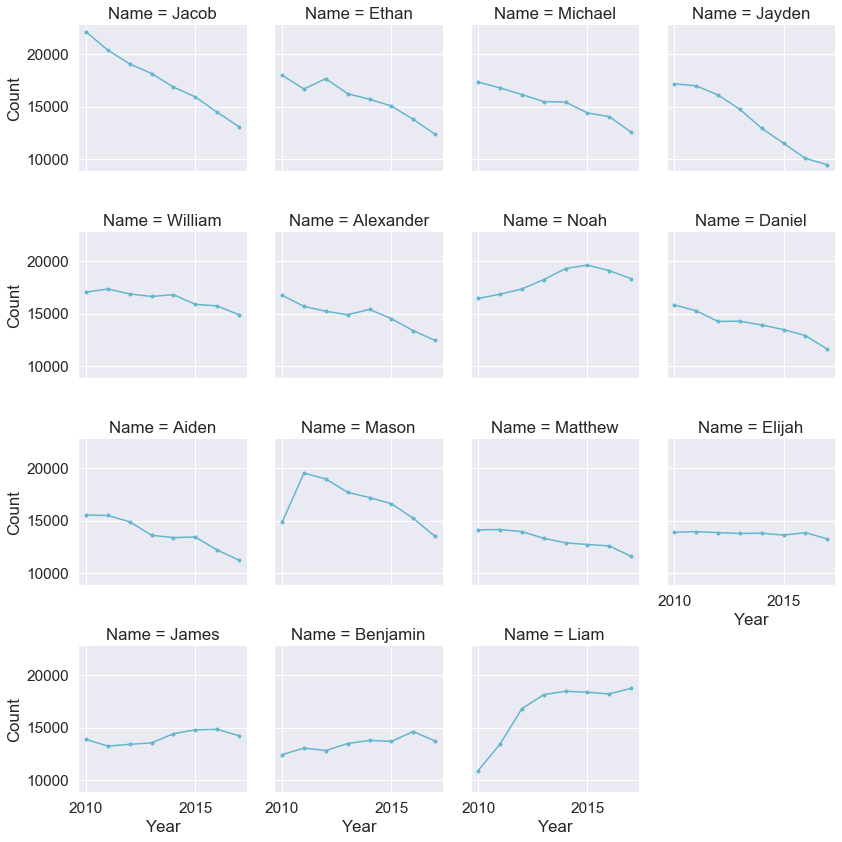

In [38]:
sns.set(font_scale=1.4)
g = sns.FacetGrid(data_top15_boy, col="Name", col_wrap=4)

g = g.map(plt.plot, "Year", "Count",color="c",marker=".")
g.set(axis_bgcolor='#f2eada')

# Most popular names for each decade

In [52]:
data_decades = data[data['Year'] >=1920]
data_decades['decade'] = pd.cut(data_decades['Year'], [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2018], labels = ['20s','30s','40s','50s','60s','70s','80s','90s','00s','10s'], right=False)

C:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
data_decades

,Id,Name,Year,Gender,Count,decade
169455,169456,Mary,1920,F,70980,20s
169456,169457,Dorothy,1920,F,36643,20s
169457,169458,Helen,1920,F,35097,20s
169458,169459,Margaret,1920,F,27997,20s
169459,169460,Ruth,1920,F,26101,20s
...,...,...,...,...,...,...
1924660,1924661,Zykai,2017,M,5,10s
1924661,1924662,Zykeem,2017,M,5,10s
1924662,1924663,Zylin,2017,M,5,10s
1924663,1924664,Zylis,2017,M,5,10s


In [59]:
decade = data_decades.groupby(['decade','Gender','Name']).Count.sum().groupby(level = [0,1]).nlargest(1)

AttributeError: 'AxesSubplot' object has no property 'axis_bgcolor'

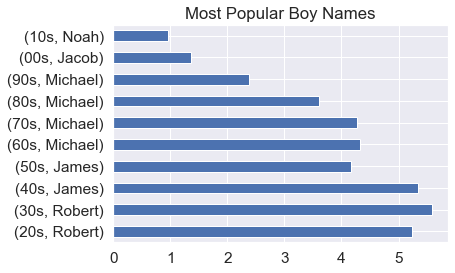

In [98]:
decade_boy_count = decade[decade.index.get_level_values(3)=='M'].reset_index(level=[0,1,3], drop=True)
decade_boy_total = data_decades[data_decades['Gender']=='M'].groupby('decade').Count.sum()
decade_boy_pct = (decade_boy_count/decade_boy_total*100).round(2)
ax = decade_boy_pct.plot.barh(title='Most Popular Boy Names')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set(axis_bgcolor='#f2eada')

In [87]:

decade_boy_count = decade[decade.index.get_level_values(3)=='M'].reset_index(level=[0,1,3], drop=True)

decade_girl_count = decade[decade.index.get_level_values(3) == 'F'].reset_index(level=[0,1,3], drop = True)

In [85]:
print(type(data_decades))

<class 'pandas.core.frame.DataFrame'>


In [96]:
decade_girl_total = data_decades[data_decades['Gender']=='F'].groupby('decade').Count.sum()

In [97]:
decade_girl_total

decade
20s    11952471
30s    10662167
40s    14483859
50s    19232179
60s    18263297
70s    15451447
80s    17171969
90s    18000547
00s    18460902
10s    14074093
Name: Count, dtype: int64

AttributeError: 'AxesSubplot' object has no property 'axis_bgcolor'

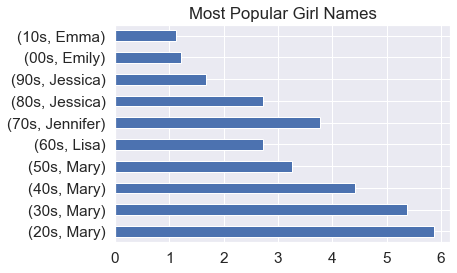

In [100]:
decade_girl_pct = (decade_girl_count/decade_girl_total*100).round(2)
ax = decade_girl_pct.plot.barh(title='Most Popular Girl Names')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set(axis_bgcolor='#f2eada')